# Showcasing the Correlated Field model


_Adapted from https://gitlab.mpcdf.mpg.de/ift/tutorial_nifty_resolve_


The field model roughly works like this:

`f = HT( A * xi ) + offset`

`A` is a spectral power field which is constructed from power spectra.
It is pointwise multiplied by a Gaussian excitation field, yielding
a representation of the field in harmonic space.
It is then transformed into the target real space and an offset added.

The power spectra `A` is constructed of are in turn constructed as the sum of a power law component
and an integrated Wiener process whose amplitude and roughness can be set.

## Setup code

In [11]:
%matplotlib inline
import nifty8.re as ift
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
import jax.numpy as np
import jax

from helpers import init_model, eval_model

shape = (128, 128)
distances = (3., 3.,)

random_key = jax.random.key(42)

## The Neutral Field

To demonstrate the effect of all parameters, first a 'neutral' set of parameters
is defined which then are varied one by one, showing the effect of the variation
on the generated field realizations and the underlying power spectrum from which
they were drawn.

As a neutral field, a model with a white power spectrum and vanishing spectral power was chosen.

In [12]:
# Neutral model parameters yielding a quasi-constant field
cf_make_pars = {
    'offset_mean': 0.,
    'offset_std': (1e-3, 1e-16),
    'prefix': ''
}

cf_x_fluct_pars = {
    'shape': shape,
    'distances': distances,
    'fluctuations': (1., 1e-16),
    'flexibility': (1e-3, 1e-16),
    'asperity': (1e-3, 1e-16),
    'loglogavgslope': (0., 1e-16)
}

sample = init_model(cf_make_pars, cf_x_fluct_pars, random_key)

<Figure size 640x480 with 0 Axes>

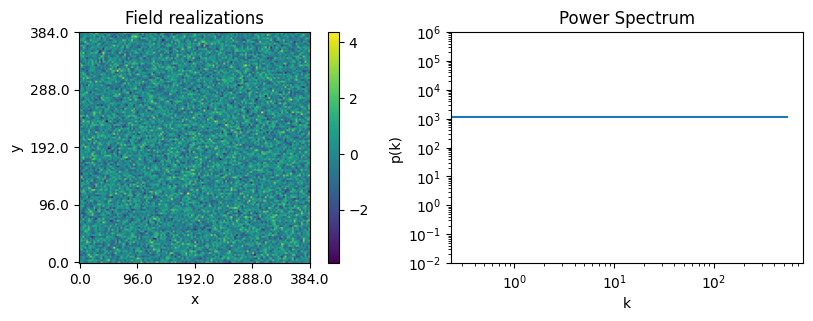

In [13]:
# Show neutral field
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "Neutral Field")

# Parameter Showcases

## The `fluctuations` parameters of `add_fluctuations()`

determine the **amplitude of variations along the field dimension**
for which `add_fluctuations` is called.

`fluctuations[0]` set the _average_ amplitude of the fields fluctuations along the given dimension,\
`fluctuations[1]` sets the width and shape of the amplitude distribution.


#### `fluctuations` mean:

<Figure size 640x480 with 0 Axes>

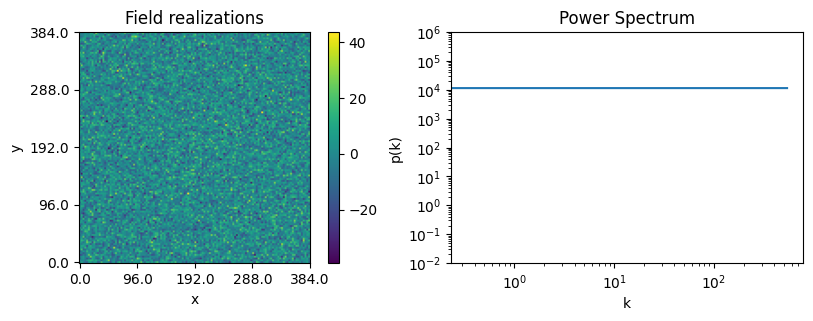

<Figure size 640x480 with 0 Axes>

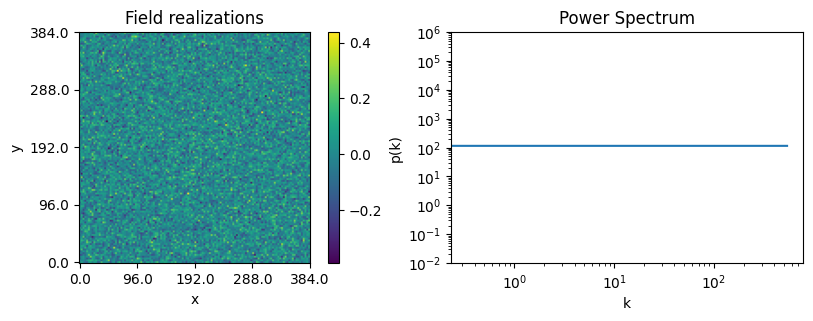

<Figure size 640x480 with 0 Axes>

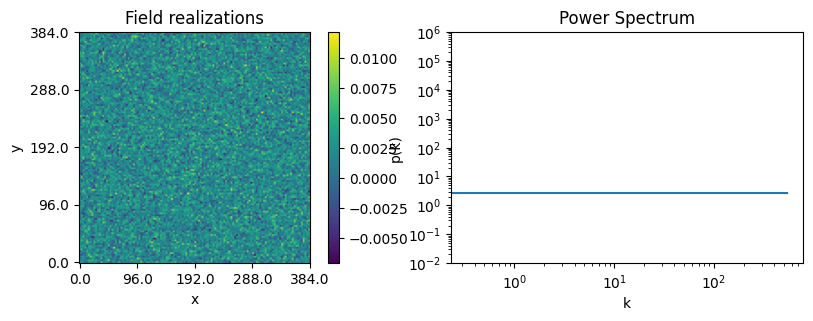

In [14]:
cf_x_fluct_pars['fluctuations'] = (10., 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "fluctuations = (10, 0)")

cf_x_fluct_pars['fluctuations'] = (0.1, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "fluctuations = (0.1, 0)")

cf_x_fluct_pars['fluctuations'] = (1., 100.)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "fluctuations = (1., 100)")

cf_x_fluct_pars['fluctuations'] = (0.1, 1e-16)


## The `loglogavgslope` parameters of `add_fluctuations()`

determine **the slope of the loglog-linear (power law) component of the power spectrum**.

The slope is modelled to be normally distributed.

#### `loglogavgslope` mean:

<Figure size 640x480 with 0 Axes>

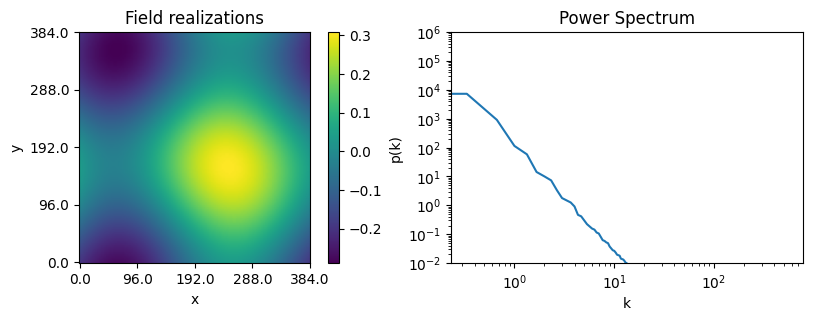

<Figure size 640x480 with 0 Axes>

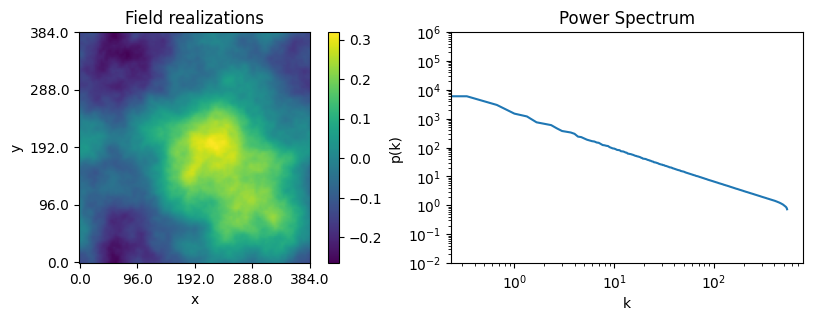

<Figure size 640x480 with 0 Axes>

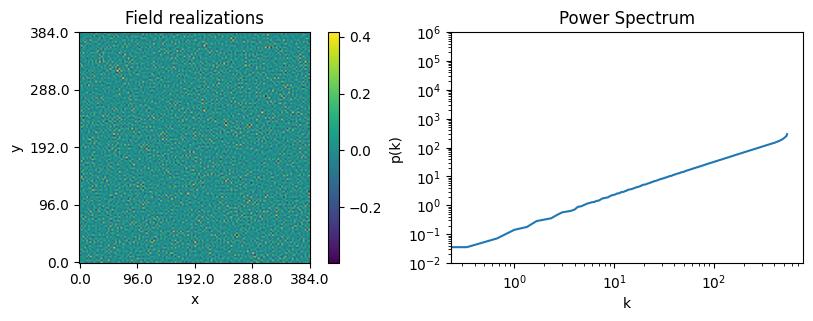

In [15]:
cf_x_fluct_pars['loglogavgslope'] = (-6., 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "loglogavgslope = (-6., 0)")

cf_x_fluct_pars['loglogavgslope'] = (-2.0, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "loglogavgslope = (-2.0, 0)")

cf_x_fluct_pars['loglogavgslope'] = (2., 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "loglogavgslope = (2., 0)")

cf_x_fluct_pars['loglogavgslope'] = (0., 1e-16)

## The `flexibility` parameters of `add_fluctuations()`

determine **the amplitude of the integrated Wiener process component of the power spectrum**
(how strong the power spectrum varies besides the power-law).

`flexibility[0]` sets the _average_ amplitude of the i.g.p. component,\
`flexibility[1]` sets how much the amplitude can vary.\

#### `flexibility` mean:

<Figure size 640x480 with 0 Axes>

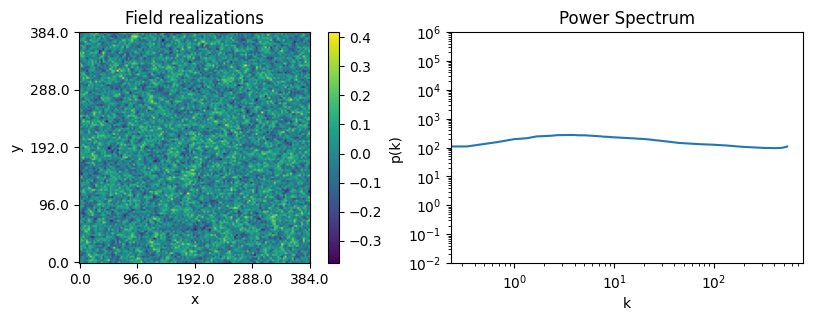

<Figure size 640x480 with 0 Axes>

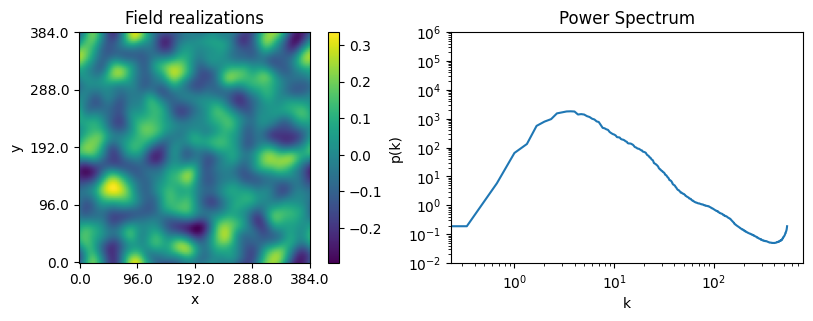

<Figure size 640x480 with 0 Axes>

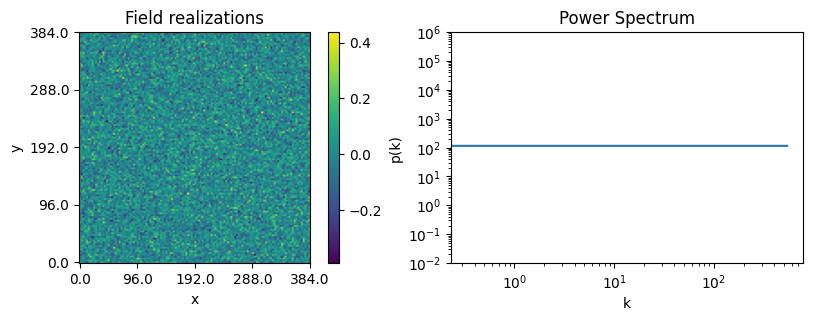

In [16]:

cf_x_fluct_pars['flexibility'] = (.4, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "flexibility = (0.4, 0)")

cf_x_fluct_pars['flexibility'] = (4.0, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "flexibility = (4.0, 0)")

cf_x_fluct_pars['flexibility'] = (.001, 100.)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "flexibility = (.001, 100)")

cf_x_fluct_pars['flexibility'] = (0.001, 1e-16)

## The `asperity` parameters of `add_fluctuations()`

`asperity` determines **how rough the integrated Wiener process component of the power spectrum is**.

`asperity[0]` sets the average roughness, `asperity[1]` sets how much the roughness can vary.\
These two parameters feed into a moment-matched log-normal distribution model,
see above for a demo of its behavior.

#### `asperity`:

<Figure size 640x480 with 0 Axes>

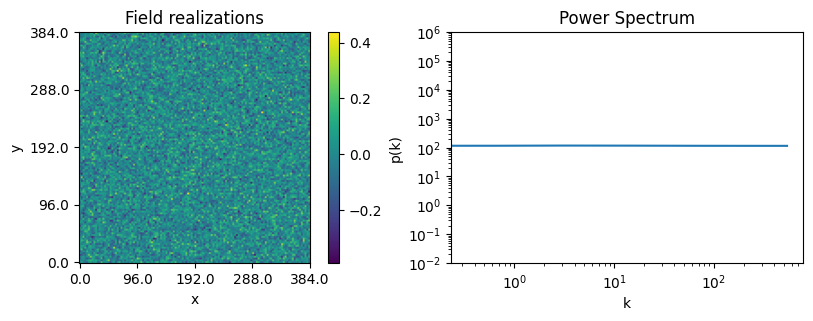

<Figure size 640x480 with 0 Axes>

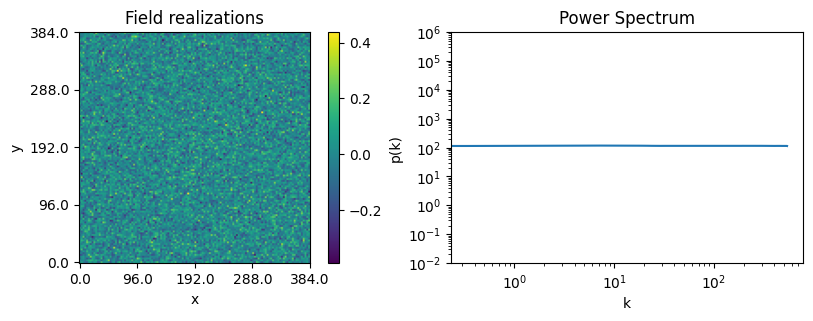

<Figure size 640x480 with 0 Axes>

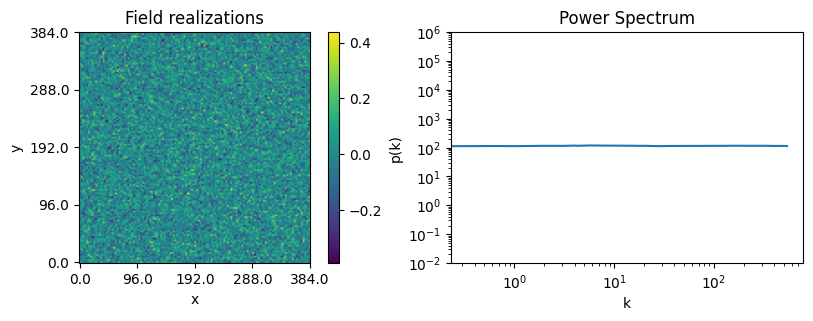

In [17]:

cf_x_fluct_pars['flexibility'] = (0.01, 1e-16)

cf_x_fluct_pars['asperity'] = (.001, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "asperity = (0.4, 0)")

cf_x_fluct_pars['asperity'] = (1.0, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "asperity = (1.0, 0)")

cf_x_fluct_pars['asperity'] = (5., 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "asperity = (5, 0)")

cf_x_fluct_pars['asperity'] = (0.001, 1e-16)

## The `offset_mean` parameter of `CorrelatedFieldMaker()`

The `offset_mean` parameter defines a global additive offset on the field realizations.

If the field is used for a lognormal model `f = field.exp()`, this acts as a global signal magnitude offset.

In [18]:
# Reset model to neutral
cf_x_fluct_pars['fluctuations'] = (1e-3, 1e-16)
cf_x_fluct_pars['flexibility'] = (1e-3, 1e-16)
cf_x_fluct_pars['asperity'] = (1e-3, 1e-16)
cf_x_fluct_pars['loglogavgslope'] = (1e-3, 1e-16)

<Figure size 640x480 with 0 Axes>

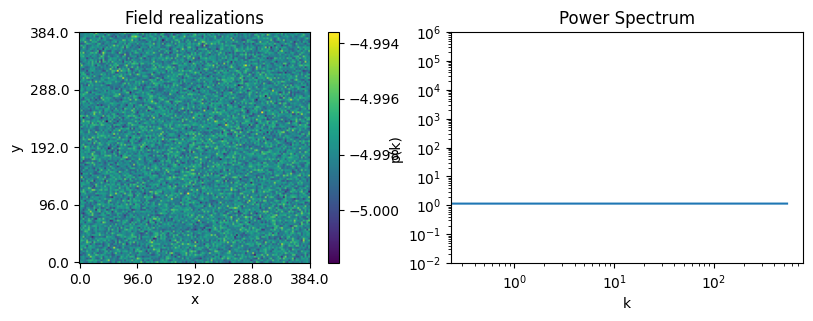

<Figure size 640x480 with 0 Axes>

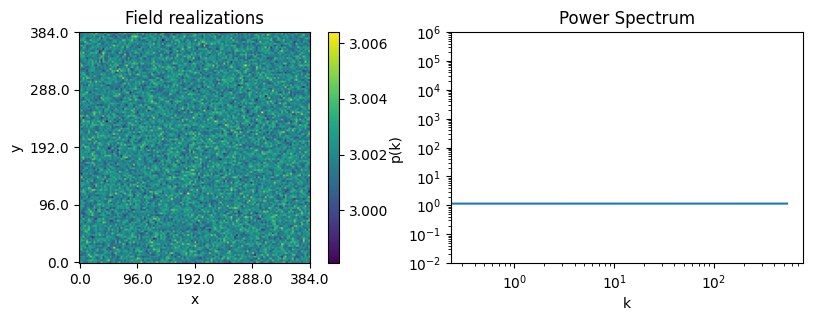

<Figure size 640x480 with 0 Axes>

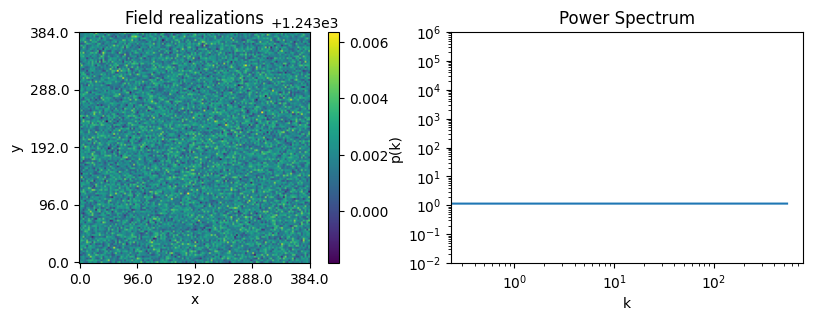

In [19]:
cf_make_pars['offset_mean'] = -5.
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "offset_mean = -5")

cf_make_pars['offset_mean'] = 3.
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "asperity = 3")

cf_make_pars['offset_mean'] = 1243
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "asperity = 1243")

cf_make_pars['offset_mean'] = 0.

## The `offset_std` parameters of `CorrelatedFieldMaker()`

Variation of the global offset of the field are modelled as being log-normally distributed.

The `offset_std[0]` parameter sets how much NIFTy will vary the offset *on average*.\
The `offset_std[1]` parameters defines the with and shape of the offset variation distribution.

#### `offset_std` and `offset_std_std`:

<Figure size 640x480 with 0 Axes>

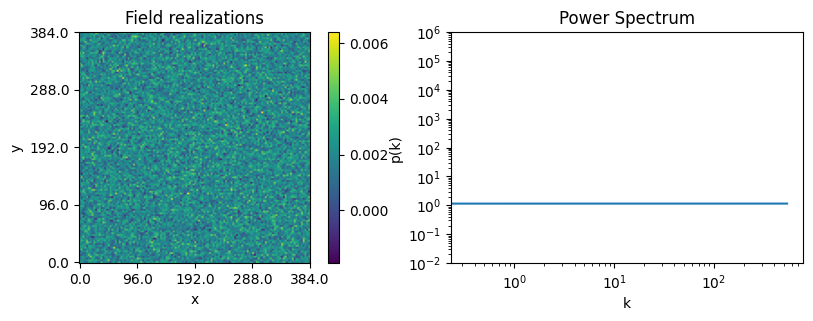

<Figure size 640x480 with 0 Axes>

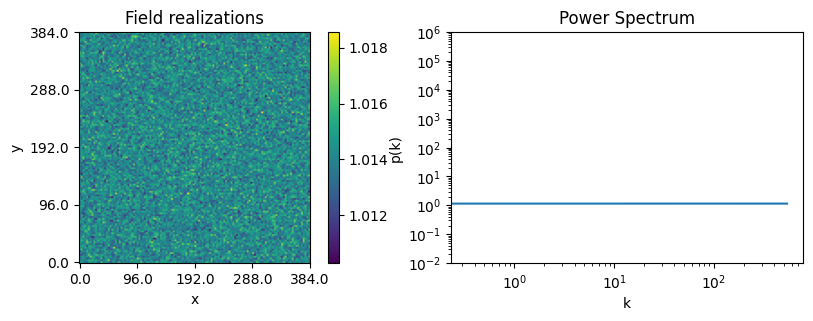

<Figure size 640x480 with 0 Axes>

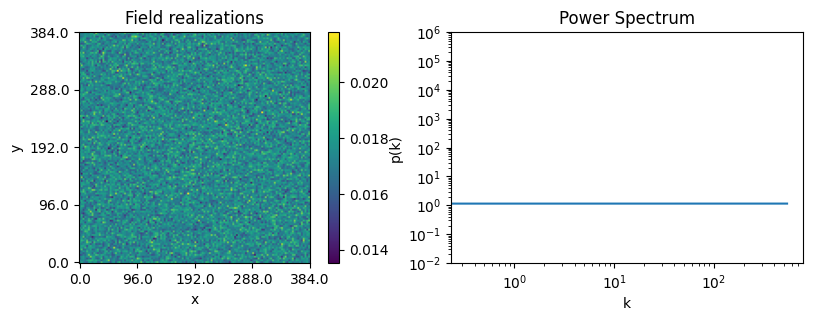

In [20]:
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances,  sample, "offset_std = (1e-16, 1e-16)")

cf_make_pars['offset_std'] = (0.5, 1e-16)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample, "offset_std = (0.5, 1e-16)")

cf_make_pars['offset_std'] = (0.5, 5.)
init_model(cf_make_pars, cf_x_fluct_pars)
eval_model(cf_make_pars, cf_x_fluct_pars, distances, sample,  "offset_std = 0.5, 5.)")

cf_make_pars['offset_std'] = (1e-3, 1e-16)